# 装载数据

In [1]:
import pickle
node_dict={}
node_dict_amap={}
way_list=[]
with open('map_nodes.pkl','rb') as f:
    node_dict=pickle.load(f)
with open('map_nodes_amap.pkl','rb') as f:
    node_dict_amap=pickle.load(f)
with open('map_ways.pkl','rb') as f:
    way_list=pickle.load(f)

# 清理数据
将没有在高德地图中出现的数据去除

In [2]:
# a中包含了高德地图包含的所有道路名称
a=['沪闵路', '沪昆高速', '外环高速', '莘松路', '水清路', '顾戴路', '宝铭路', '金都路', '新镇路', '七莘路', '中春路', '古美西路', '虹莘路', '宝安公路', '沪太路', '长江西路', '水产西路', '锦秋路', '逸仙高架路', '殷高西路', '铁力路', '淞沪路', '闸殷路', '殷行路', '江湾城路', '国帆路', '长江路', '新二路', '通南路', '殷高路', '军工路', '国权北路', '江心沙路', '长逸路', '长江南路', '淞南路', '真南路', '沪嘉高速', '古浪路', '丰翔路', '南大路', '祁连山路', '林海公路', '沪南公路', '杨高南路', '年家浜路', '东明路', '康梧路', '上南路', '蕰川公路', '南北高架路', '江杨南路', '水产路', '江杨北路', '通河路', '岭南路', '阳曲路', '一二八纪念路', '三泉路', '共江路', '爱辉路', '虎林路', '浦星公路', '济阳路', '永泰路', '长清路', '三鲁公路', '三林路', '灵岩南路', '康新公路', '年家浜东路', '周邓公路', '周祝公路', '沪青平公路', '沪渝高速', '虹渝高架路', '延安高架路', '迎宾一路', '沪松公路', '漕宝路', '迎宾三路地道', '迎宾三路', '吴中路', '宜山路', '空港一路', '平南路', '东兰路', '田林路', '龙茗路', '金汇路', '虹井路', '虹中路', '合川路', '金汇南路', '程家桥路', '北翟高架路', '中环路', '虹桥路', '宁虹路', '天山西路', '仙霞西路', '淞虹路', '祁连山南路', '天山路', '长宁路', '虹梅路', '虹古路', '仙霞路', '龙溪路', '青溪路', '哈密路', '剑河路', '威宁路', '北翟路', '茅台路', '云岭东路', '同普路', '真华路', '华灵路', '大华三路', '大华路', '行知路', '高平路', '江场西路', '真金路', '原平路', '沪太支路', '少年村路', '场中路', '芳甸路', '内环高架路', '世纪大道', '沪南路', '杨高中路', '高科西路', '博华路', '丁香路', '民生路', '浦建路', '花木路', '迎春路', '东方路', '浦电路', '福山路', '源深路', '张杨路', '北艾路', '严中路', '下南路', '莲溪路', '莲园路', '前程路', '灵山路', '桃林路', '羽山路', '东三里桥路', '锦绣路', '白杨路', '梅花路', '峨山路', '南泉路', '崂山路', '沪金高速', '沪闵高架路', '银都路', '虹梅南路', '春申路', '莲花南路', '罗秀路', '上中西路', '梅陇路', '古美路', '莲花路', '康桥路', '御桥路', '浦三路', '成山路', '西泰林路', '东泰林路', '高青路', '齐河路', '曹安公路', '铜川路', '京沪高速', '武宁路', '桃浦路', '泸定路', '宁夏路', '长寿路', '大渡河路', '金沙江路', '曹杨路', '岚皋路', '潮州路', '新村路', '武宁南路', '枣阳路', '中江路', '凯旋北路', '白玉路', '白兰路', '普雄路', '光复西路', '梅岭南路', '杨柳青路', '梅岭北路', '梅川路', '真光路', '延长西路', '中宁路', '镇坪路', '石泉路', '交通路', '兰溪路', '芝川路', '双山路', '灵石路', '寿阳路', '广中西路', '广中路', '水电路', '运城路', '大宁路', '万荣路', '新同心路', '广灵四路', '广粤路', '江场路', '汾西路', '保德路', '车站南路', '凉城路', '奎照路', '同心路', '北宝兴路', '株洲路', '平型关路', '彭江路', '粤秀路', '龙吴路', '龙川北路', '老沪闵路', '泳耀路', '耀龙路', '耀体路', '通耀路', '打浦路隧道', '龙耀路', '西营路', '耀华路', '世博大道', '西藏南路隧道', '浦东南路', '凌兆路', '上浦路', '杨南路', '德州路', '雪野二路', '世博馆路', '海阳路', '杨思路', '昌里路', '洪山路', '云台路', '云莲路', '周家渡路', '邹平路', '昌里东路', '南码头路', '长清北路', '国展路', '博成路', '雪野路', '石龙路', '龙漕路', '龙华路', '钦州南路', '柳州路', '瑞宁路', '龙水南路', '云锦路', '龙腾大道', '宛平南路', '龙华中路', '东安路', '斜土路', '漕溪北路', '百色路', '龙华西路', '后滩路', '丰谷路', '零陵路', '枫林路', '钦州路', '田林东路', '天钥桥路', '文定路', '凯旋路', '金沙江西路', '陇南路', '丰华公路', '华江公路', '万镇路', '丰庄北路', '泾阳路', '清峪路', '丰庄西路', '丰庄路', '五莲路', '五洲大道', '翔殷路', '杨高北路', '浦东大道', '东陆路', '凌河路', '巨峰路', '东靖路', '东葛路', '张杨北路', '富特南路', '洲海路', '富特中路', '浦东北路', '博兴路', '金高路', '双桥路', '莱阳路', '利津路', '东波路', '澳尼路', '德堡路', '东塘公路', '桂林路', '江安路', '虹漕南路', '桂平路', '万源路', '虹漕路', '钦州北路', '丹桂路', '张江路', '龙东大道', '罗山路', '张衡路', '高科中路', '祖冲之路', '黑松路', '锦绣东路', '云山路', '金桥路', '科苑路', '金科路', '郭守敬路', '白桦路', '碧波路', '南丹路', '古北路', '定西路', '江苏路', '江苏北路', '吴中东路', '宋园路', '广元西路', '红松东路', '姚虹路', '古羊路', '水城南路', '伊犁路', '淮海西路', '番禺路', '安顺路', '新华路', '水城路', '法华镇路', '武夷路', '华阳路', '娄山关路', '遵义路', '芙蓉江路', '玉屏南路', '天山支路', '愚园路', '万航渡路', '武定西路', '康定路', '中原路', '包头路', '国伟路', '港城路', '白城路', '市光路', '开鲁路', '大同公路', '中高公路', '世界路', '江东路', '双江路', '周家嘴路', '营口路', '嫩江路', '民庆路', '政立路', '长阳路', '本溪路', '凤城路', '延吉西路', '抚顺路', '控江路', '双阳路', '延吉中路', '黄兴路', '国权东路', '松花江路', '双阳北路', '国顺东路', '平凉路', '河间路', '隆昌路', '黎平路', '内江路', '图们路', '敦化路', '延吉东路', '包头南路', '政通路', '长海路', '国和路', '恒仁路', '民星路', '金科南路', '大连西路', '四平路', '曲阳路', '国定东路', '国定路', '新市南路', '纪念路', '欧阳路', '玉田路', '东体育会路', '江浦路', '天宝路', '锦西路', '铁岭路', '鞍山路', '阜新路', '密云路', '赤峰路', '彰武路', '长岭路', '政本路', '辉河路', '运光路', '政修路', '国权路', '国顺路', '仁德路', '新市北路', '政民路', '武东路', '武川路', '商城路', '九江路', '陆家嘴西路', '东园路', '延安东路隧道', '河南南路', '浦明路', '中山东一路', '河南中路', '北京东路', '中山东二路', '人民路隧道', '东泰路', '花园石桥路', '银城中路', '银城路', '昌邑路', '外滩隧道', '陆家嘴环路', '陆家嘴东路', '人民大道', '西藏中路', '中兴路', '海宁路', '天目东路', '宝山路', '河南北路', '吴淞路', '东宝兴路', '花园路', '东江湾路', '大连路', '金陵东路', '福建南路', '浦城路', '南泉北路', '福建中路', '四川中路', '东昌路', '富城路', '栖霞路', '乳山路', '临潼路', '丰和路', '大名路', '长治路', '新建路隧道', '汉阳路', '湖北路', '曲阜路', '福建北路', '浙江北路', '虬江路', '天潼路', '武进路', '衡水路', '四川北路', '海伦路', '海伦西路', '溧阳路', '山阴路', '芷江支路', '华昌路', '天通庵路', '西江湾路', '祥德路', '东大名路', '东长治路', '东汉阳路', '新建路', '海门路', '公平路', '舟山路', '通州路', '唐山路', '霍山路', '惠民路', '许昌路', '杨树浦路', '岳州路', '临平路', '天虹路', '临平北路', '飞虹路', '瑞虹路', '新港路', '打虎山路', '天宝西路', '南京东路', '博山东路', '居家桥路', '南洋泾路', '巨野路', '苗圃路', '崮山路', '博山路', '眉州路', '兰州路', '德平路', '栖山路', '临青路', '宁武路', '北京西路', '巨鹿路', '铜仁路', '日晖东路', '大木桥路', '肇嘉浜路', '打浦路', '瑞金南路', '衡山路', '华山路', '徐家汇路', '南丹东路', '宝庆路', '常熟路', '淮海中路', '金陵西路', '金陵中路', '黄陂北路', '常德路', '龙华东路', '小木桥路', '建国西路', '岳阳路', '天平路', '宛平路', '乌鲁木齐南路', '湖南路', '武康路', '复兴西路', '泰康路', '思南路', '宜山北路', '乌鲁木齐中路', '镇宁路', '乌鲁木齐北路', '陕西北路', '西康路', '江宁路', '永嘉路', '汾阳路', '陕西南路', '复兴中路', '东湖路', '南昌路', '丽园路', '茂名南路', '襄阳北路', '长乐路', '富民路', '马当路', '淡水路', '黄陂南路', '自忠路', '兴业路', '武胜路', '威海路', '南京西路', '新闸路', '延平路', '武定路', '胶州路', '余姚路', '光新路', '志丹路', '恒丰路', '天目西路', '秣陵路', '恒丰北路', '天目中路', '西藏北路', '西宝兴路', '柳营路', '昌平路', '海防路', '安远路', '昌化路', '宜昌路', '中潭路', '交通西路', '宜川路', '延长中路', '石门二路', '康定东路', '乌镇路', '恒通路', '长安路', '梅园路', '民立路', '大统路', '芷江西路', '会文路', '芷江中路', '洛川中路', '延长路', '庭安路', '日樱北路', '航津路', '富特北路', '华申路', '普安路', '斜土东路', '西藏南路', '人民路', '淮海东路', '南车站路', '国货路', '陆家浜路', '中山南路', '复兴东路', '蒙自路', '顺昌路', '临沂路', '制造局路', '白莲泾路', '华丰路', '世博村路', '半淞园路', '局门路', '肇周路', '建国新路', '安澜路', '方浜中路', '济南路', '旧校场路', '福佑路', '丽水路', '临沂北路', '塘桥新路', '南仓街', '潍坊西路', '董家渡路', '中华路', '三牌楼路', '东门路', '金海路', '明月路', '碧云路', '枣庄路', '红枫路', '川桥路', '金港路', '新金桥路', '蓝天路', '金杨路', '云桥路', '金藏路', '金沪路', '平度路', '胶东路', '台儿庄路', '长岛路', '荷泽路', '佳林路', '佳京路', '兰城路', '金鼎路', '嘉闵高架路', '沈海高速', '上海绕城高速']
del_way=[]
for way in way_list:
    if way[0] not in a:
        del_way.append(way)
for w in del_way:
    way_list.remove(w)

查询上海市行政区边界polyline

In [3]:
import requests
import json
import numpy as np
from fake_useragent import UserAgent
server_host='https://restapi.amap.com/v3/config/district'
parameters={
    'key':'111d1e3797ffa20c7d44a42ab0bed3fd',
    'keywords':'上海市',
    'subdistrict':0,
    'extensions':'all'
}
response=requests.get(url=server_host,
                     headers={'User-Agent':UserAgent(path='fakeuseragent.json').random},
                     params=parameters)
response.encoding=response.apparent_encoding
res=json.loads(response.text)
poly_lines=res['districts'][0]['polyline'].split('|')
poly_lines=[line.split(';') for line in poly_lines]
for i in range(len(poly_lines)):
    poly_lines[i]=np.array([point.split(',') for point in poly_lines[i]],dtype=float).T
sh_poly_lines=poly_lines

绘制道路地理图

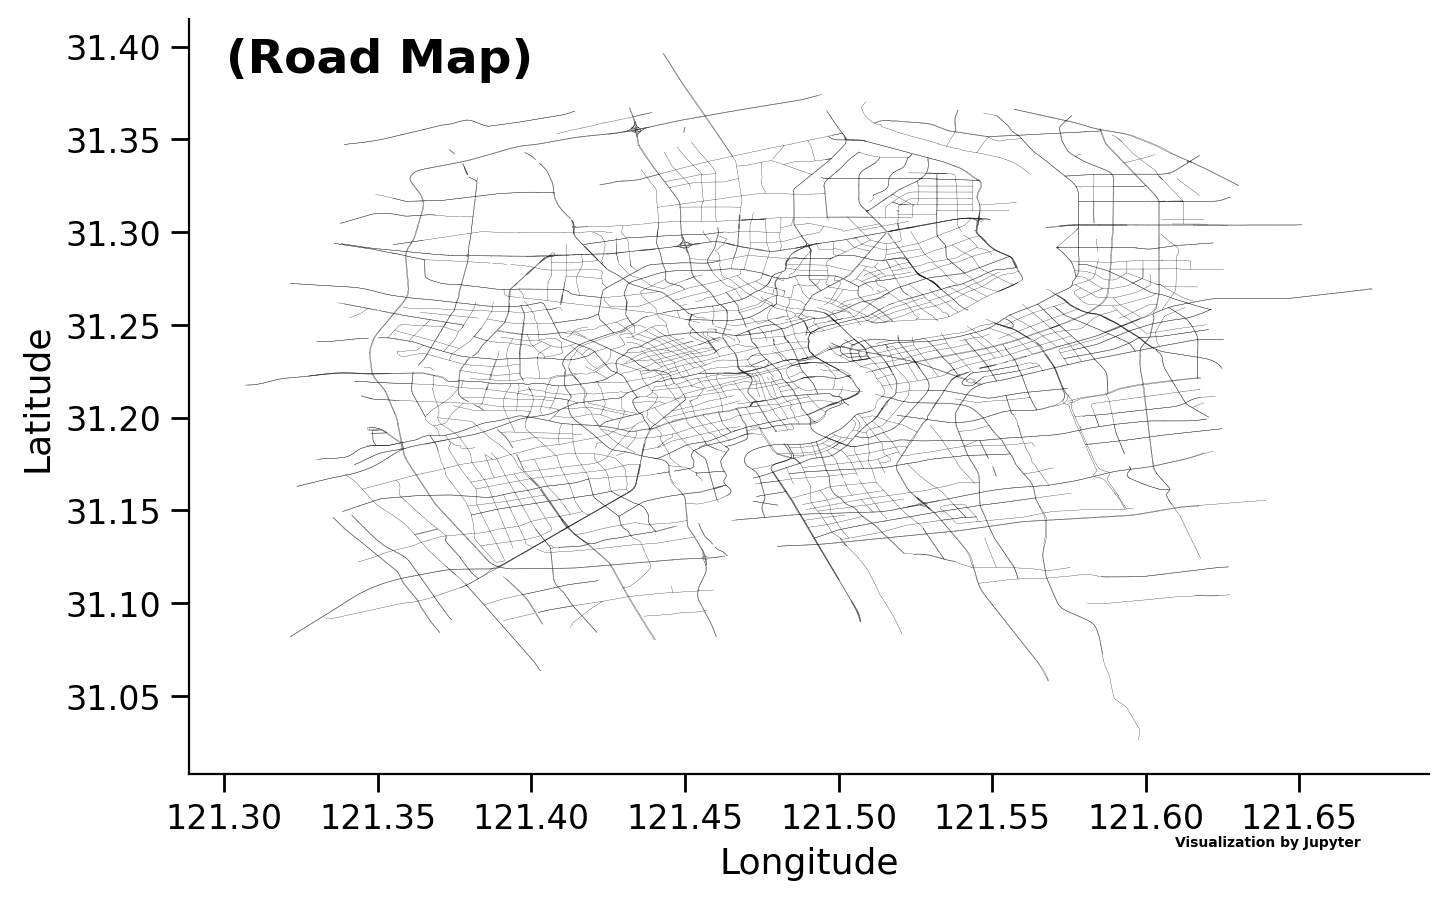

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,5),dpi=200)
# 绘制上海行政区边界
# for line in sh_poly_lines:
#     ax.plot(line[0],line[1],color='black',linewidth=.1)
# 绘制各条道路的线条
for way in way_list:
    road_polyline=np.array([node_dict_amap[ref] for ref in way[1]],dtype='float')
    #road_polyline=np.array([road_polyline[0],road_polyline[-1]])
    road_polyline=road_polyline.T
    ax.plot(road_polyline[0],road_polyline[1],color='black',linewidth=.1)

ax.tick_params(direction='out',labelsize=12,length=6.5,width=1,top=False,right=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Latitude',fontsize=13)
ax.set_xlabel('Longitude',fontsize=13)
text_font = {'size':'17','weight':'bold','color':'black'}
ax.text(.03,.93,'(Road Map)',transform = ax.transAxes,fontdict=text_font,zorder=4)
ax.text(.87,-.08,'\nVisualization by Jupyter',transform = ax.transAxes, ha='center', va='center',fontsize = 5,color='black',fontweight='bold')
fig.show()

# 构建拓扑图

In [4]:
graph={}
for way in way_list:
    name=way[0]
    for i in range(1,len(way[1])):
        s,d=way[1][i-1],way[1][i]#某条边的起讫点
        if s not in graph:
            graph[s]=[[],[[name,d]]]
        else:
            graph[s][1].append([name,d])
        if d not in graph:
            graph[d]=[[[name,s]],[]]
        else:
            graph[d][0].append([name,s])
# 去除非交点的中间节点
del_vertex=[]
for v,e in graph.items():
#     if len(e[0])==0 and len(e[1])==1:
#         del_vertex.append(v)
#         descendant=e[1][0][1]
#         graph[descendant][0].remove([e[1][0][0],v])
#     elif len(e[0])==1 and len(e[1])==0:
#         del_vertex.append(v)
#         ancestor=e[0][0][1]
#         graph[ancestor][1].remove([e[0][0][0],v])
    if len(e[0])==1 and len(e[1])==1 and e[0][0][0]==e[1][0][0]:# 筛选无用节点
        del_vertex.append(v)
        ancestor=e[0][0][1]
        descendant=e[1][0][1]
        for i in range(len(graph[ancestor][1])):
            if graph[ancestor][1][i][1]==v:
                graph[ancestor][1][i][1]=descendant
                break
        for i in range(len(graph[descendant][0])):
            if graph[descendant][0][i][1]==v:
                graph[descendant][0][i][1]=ancestor
                break 
print(len(del_vertex))
for v in del_vertex:
    if v in graph:
        graph.pop(v)
print(len(graph))
# 35373
# 7465

38699
4606


## 构建边索引

In [5]:
pointers={}
for v,value in graph.items():
    ein,eout=value[0],value[1]
    for no,out in enumerate(eout):
        next_e=graph[out[1]][1]
        for source in ein:
            for end in next_e:
                if out[0] not in pointers:
                    pointers[out[0]]=[(source[0],end[0],v,no)]
                else:
                    pointers[out[0]].append((source[0],end[0],v,no))

检查完整性

In [5]:
# print(list(pointers.keys()))
# print(pointers['邯郸路'])
# print(pointers['吴淞路'])
# print(pointers['四平路'])
a=['沪闵路', '沪昆高速', '外环高速', '莘松路', '水清路', '顾戴路', '宝铭路', '金都路', '新镇路', '七莘路', '中春路', '古美西路', '虹莘路', '宝安公路', '沪太路', '长江西路', '水产西路', '锦秋路', '逸仙高架路', '殷高西路', '铁力路', '淞沪路', '闸殷路', '殷行路', '江湾城路', '国帆路', '长江路', '新二路', '通南路', '殷高路', '军工路', '国权北路', '江心沙路', '长逸路', '长江南路', '淞南路', '真南路', '沪嘉高速', '古浪路', '丰翔路', '南大路', '祁连山路', '林海公路', '沪南公路', '杨高南路', '年家浜路', '东明路', '康梧路', '上南路', '蕰川公路', '南北高架路', '江杨南路', '水产路', '江杨北路', '通河路', '岭南路', '阳曲路', '一二八纪念路', '三泉路', '共江路', '爱辉路', '虎林路', '浦星公路', '济阳路', '永泰路', '长清路', '三鲁公路', '三林路', '灵岩南路', '康新公路', '年家浜东路', '周邓公路', '周祝公路', '沪青平公路', '沪渝高速', '虹渝高架路', '延安高架路', '迎宾一路', '沪松公路', '漕宝路', '迎宾三路地道', '迎宾三路', '吴中路', '宜山路', '空港一路', '平南路', '东兰路', '田林路', '龙茗路', '金汇路', '虹井路', '虹中路', '合川路', '金汇南路', '程家桥路', '北翟高架路', '中环路', '虹桥路', '宁虹路', '天山西路', '仙霞西路', '淞虹路', '祁连山南路', '天山路', '长宁路', '虹梅路', '虹古路', '仙霞路', '龙溪路', '青溪路', '哈密路', '剑河路', '威宁路', '北翟路', '茅台路', '云岭东路', '同普路', '真华路', '华灵路', '大华三路', '大华路', '行知路', '高平路', '江场西路', '真金路', '原平路', '沪太支路', '少年村路', '场中路', '芳甸路', '内环高架路', '世纪大道', '沪南路', '杨高中路', '高科西路', '博华路', '丁香路', '民生路', '浦建路', '花木路', '迎春路', '东方路', '浦电路', '福山路', '源深路', '张杨路', '北艾路', '严中路', '下南路', '莲溪路', '莲园路', '前程路', '灵山路', '桃林路', '羽山路', '东三里桥路', '锦绣路', '白杨路', '梅花路', '峨山路', '南泉路', '崂山路', '沪金高速', '沪闵高架路', '银都路', '虹梅南路', '春申路', '莲花南路', '罗秀路', '上中西路', '梅陇路', '古美路', '莲花路', '康桥路', '御桥路', '浦三路', '成山路', '西泰林路', '东泰林路', '高青路', '齐河路', '曹安公路', '铜川路', '京沪高速', '武宁路', '桃浦路', '泸定路', '宁夏路', '长寿路', '大渡河路', '金沙江路', '曹杨路', '岚皋路', '潮州路', '新村路', '武宁南路', '枣阳路', '中江路', '凯旋北路', '白玉路', '白兰路', '普雄路', '光复西路', '梅岭南路', '杨柳青路', '梅岭北路', '梅川路', '真光路', '延长西路', '中宁路', '镇坪路', '石泉路', '交通路', '兰溪路', '芝川路', '双山路', '灵石路', '寿阳路', '广中西路', '广中路', '水电路', '运城路', '大宁路', '万荣路', '新同心路', '广灵四路', '广粤路', '江场路', '汾西路', '保德路', '车站南路', '凉城路', '奎照路', '同心路', '北宝兴路', '株洲路', '平型关路', '彭江路', '粤秀路', '龙吴路', '龙川北路', '老沪闵路', '泳耀路', '耀龙路', '耀体路', '通耀路', '打浦路隧道', '龙耀路', '西营路', '耀华路', '世博大道', '西藏南路隧道', '浦东南路', '凌兆路', '上浦路', '杨南路', '德州路', '雪野二路', '世博馆路', '海阳路', '杨思路', '昌里路', '洪山路', '云台路', '云莲路', '周家渡路', '邹平路', '昌里东路', '南码头路', '长清北路', '国展路', '博成路', '雪野路', '石龙路', '龙漕路', '龙华路', '钦州南路', '柳州路', '瑞宁路', '龙水南路', '云锦路', '龙腾大道', '宛平南路', '龙华中路', '东安路', '斜土路', '漕溪北路', '百色路', '龙华西路', '后滩路', '丰谷路', '零陵路', '枫林路', '钦州路', '田林东路', '天钥桥路', '文定路', '凯旋路', '金沙江西路', '陇南路', '丰华公路', '华江公路', '万镇路', '丰庄北路', '泾阳路', '清峪路', '丰庄西路', '丰庄路', '五莲路', '五洲大道', '翔殷路', '杨高北路', '浦东大道', '东陆路', '凌河路', '巨峰路', '东靖路', '东葛路', '张杨北路', '富特南路', '洲海路', '富特中路', '浦东北路', '博兴路', '金高路', '双桥路', '莱阳路', '利津路', '东波路', '澳尼路', '德堡路', '东塘公路', '桂林路', '江安路', '虹漕南路', '桂平路', '万源路', '虹漕路', '钦州北路', '丹桂路', '张江路', '龙东大道', '罗山路', '张衡路', '高科中路', '祖冲之路', '黑松路', '锦绣东路', '云山路', '金桥路', '科苑路', '金科路', '郭守敬路', '白桦路', '碧波路', '南丹路', '古北路', '定西路', '江苏路', '江苏北路', '吴中东路', '宋园路', '广元西路', '红松东路', '姚虹路', '古羊路', '水城南路', '伊犁路', '淮海西路', '番禺路', '安顺路', '新华路', '水城路', '法华镇路', '武夷路', '华阳路', '娄山关路', '遵义路', '芙蓉江路', '玉屏南路', '天山支路', '愚园路', '万航渡路', '武定西路', '康定路', '中原路', '包头路', '国伟路', '港城路', '白城路', '市光路', '开鲁路', '大同公路', '中高公路', '世界路', '江东路', '双江路', '周家嘴路', '营口路', '嫩江路', '民庆路', '政立路', '长阳路', '本溪路', '凤城路', '延吉西路', '抚顺路', '控江路', '双阳路', '延吉中路', '黄兴路', '国权东路', '松花江路', '双阳北路', '国顺东路', '平凉路', '河间路', '隆昌路', '黎平路', '内江路', '图们路', '敦化路', '延吉东路', '包头南路', '政通路', '长海路', '国和路', '恒仁路', '民星路', '金科南路', '大连西路', '四平路', '曲阳路', '国定东路', '国定路', '新市南路', '纪念路', '欧阳路', '玉田路', '东体育会路', '江浦路', '天宝路', '锦西路', '铁岭路', '鞍山路', '阜新路', '密云路', '赤峰路', '彰武路', '长岭路', '政本路', '辉河路', '运光路', '政修路', '国权路', '国顺路', '仁德路', '新市北路', '政民路', '武东路', '武川路', '商城路', '九江路', '陆家嘴西路', '东园路', '延安东路隧道', '河南南路', '浦明路', '中山东一路', '河南中路', '北京东路', '中山东二路', '人民路隧道', '东泰路', '花园石桥路', '银城中路', '银城路', '昌邑路', '外滩隧道', '陆家嘴环路', '陆家嘴东路', '人民大道', '西藏中路', '中兴路', '海宁路', '天目东路', '宝山路', '河南北路', '吴淞路', '东宝兴路', '花园路', '东江湾路', '大连路', '金陵东路', '福建南路', '浦城路', '南泉北路', '福建中路', '四川中路', '东昌路', '富城路', '栖霞路', '乳山路', '临潼路', '丰和路', '大名路', '长治路', '新建路隧道', '汉阳路', '湖北路', '曲阜路', '福建北路', '浙江北路', '虬江路', '天潼路', '武进路', '衡水路', '四川北路', '海伦路', '海伦西路', '溧阳路', '山阴路', '芷江支路', '华昌路', '天通庵路', '西江湾路', '祥德路', '东大名路', '东长治路', '东汉阳路', '新建路', '海门路', '公平路', '舟山路', '通州路', '唐山路', '霍山路', '惠民路', '许昌路', '杨树浦路', '岳州路', '临平路', '天虹路', '临平北路', '飞虹路', '瑞虹路', '新港路', '打虎山路', '天宝西路', '南京东路', '博山东路', '居家桥路', '南洋泾路', '巨野路', '苗圃路', '崮山路', '博山路', '眉州路', '兰州路', '德平路', '栖山路', '临青路', '宁武路', '北京西路', '巨鹿路', '铜仁路', '日晖东路', '大木桥路', '肇嘉浜路', '打浦路', '瑞金南路', '衡山路', '华山路', '徐家汇路', '南丹东路', '宝庆路', '常熟路', '淮海中路', '金陵西路', '金陵中路', '黄陂北路', '常德路', '龙华东路', '小木桥路', '建国西路', '岳阳路', '天平路', '宛平路', '乌鲁木齐南路', '湖南路', '武康路', '复兴西路', '泰康路', '思南路', '宜山北路', '乌鲁木齐中路', '镇宁路', '乌鲁木齐北路', '陕西北路', '西康路', '江宁路', '永嘉路', '汾阳路', '陕西南路', '复兴中路', '东湖路', '南昌路', '丽园路', '茂名南路', '襄阳北路', '长乐路', '富民路', '马当路', '淡水路', '黄陂南路', '自忠路', '兴业路', '武胜路', '威海路', '南京西路', '新闸路', '延平路', '武定路', '胶州路', '余姚路', '光新路', '志丹路', '恒丰路', '天目西路', '秣陵路', '恒丰北路', '天目中路', '西藏北路', '西宝兴路', '柳营路', '昌平路', '海防路', '安远路', '昌化路', '宜昌路', '中潭路', '交通西路', '宜川路', '延长中路', '石门二路', '康定东路', '乌镇路', '恒通路', '长安路', '梅园路', '民立路', '大统路', '芷江西路', '会文路', '芷江中路', '洛川中路', '延长路', '庭安路', '日樱北路', '航津路', '富特北路', '华申路', '普安路', '斜土东路', '西藏南路', '人民路', '淮海东路', '南车站路', '国货路', '陆家浜路', '中山南路', '复兴东路', '蒙自路', '顺昌路', '临沂路', '制造局路', '白莲泾路', '华丰路', '世博村路', '半淞园路', '局门路', '肇周路', '建国新路', '安澜路', '方浜中路', '济南路', '旧校场路', '福佑路', '丽水路', '临沂北路', '塘桥新路', '南仓街', '潍坊西路', '董家渡路', '中华路', '三牌楼路', '东门路', '金海路', '明月路', '碧云路', '枣庄路', '红枫路', '川桥路', '金港路', '新金桥路', '蓝天路', '金杨路', '云桥路', '金藏路', '金沪路', '平度路', '胶东路', '台儿庄路', '长岛路', '荷泽路', '佳林路', '佳京路', '兰城路', '金鼎路', '嘉闵高架路', '沈海高速', '上海绕城高速']
b=[]
c=[]
for i in a:
    if i not in pointers:
        b.append(i)
for i in pointers:
    if i not in a:
        c.append(i)
print(len(a))
print(len(b))
print(len(c))
print(b)
print(c)

722
49
0
['沪昆高速', '中春路', '宝安公路', '水产西路', '铁力路', '殷高路', '长江南路', '江杨北路', '周邓公路', '周祝公路', '沪渝高速', '虹渝高架路', '沪松公路', '迎宾三路地道', '北翟高架路', '宁虹路', '严中路', '沪金高速', '京沪高速', '株洲路', '瑞宁路', '后滩路', '金沙江西路', '陇南路', '丰华公路', '华江公路', '澳尼路', '德堡路', '东塘公路', '凤城路', '金科南路', '纪念路', '运光路', '仁德路', '丰和路', '湖北路', '南京东路', '秣陵路', '恒丰北路', '中潭路', '交通西路', '旧校场路', '福佑路', '丽水路', '三牌楼路', '荷泽路', '嘉闵高架路', '沈海高速', '上海绕城高速']
[]


绘制拓扑图

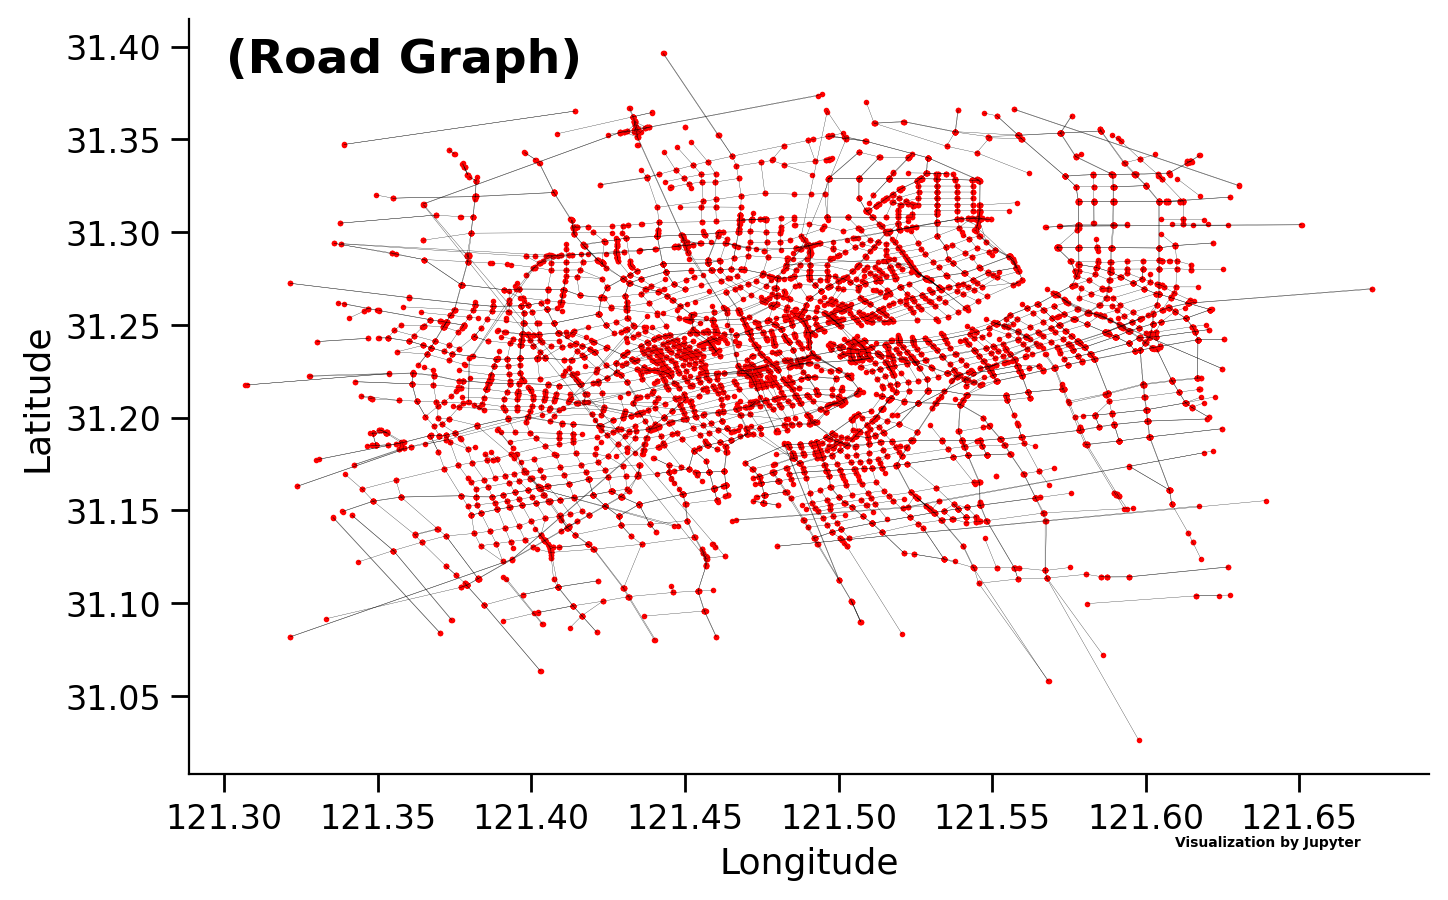

In [17]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,5),dpi=200)
ref=node_dict_amap
for v,e in graph.items():
    for oute in e[1]:
        ax.plot([float(ref[v][0]),float(ref[oute[1]][0])],[float(ref[v][1]),float(ref[oute[1]][1])],color='black',linewidth=.1)
        ax.scatter([float(ref[v][0]),float(ref[oute[1]][0])],[float(ref[v][1]),float(ref[oute[1]][1])],color='r',s=1)

ax.tick_params(direction='out',labelsize=12,length=6.5,width=1,top=False,right=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Latitude',fontsize=13)
ax.set_xlabel('Longitude',fontsize=13)
text_font = {'size':'17','weight':'bold','color':'black'}
ax.text(.03,.93,'(Road Graph)',transform = ax.transAxes,fontdict=text_font,zorder=4)
ax.text(.87,-.08,'\nVisualization by Jupyter',transform = ax.transAxes, ha='center', va='center',fontsize = 5,color='black',fontweight='bold')
fig.show()

# 保存图数据

In [6]:
import pickle
with open('graph.pkl','wb') as f:
    pickle.dump(graph, f)
with open('graph_pointers.pkl','wb') as f:
    pickle.dump(pointers, f)